In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import os

import statsmodels.tsa.stattools as ts
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import coint
from statsmodels.regression.linear_model import OLS

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
directories = ["Binance_Historical_1m_FUTURES_9_days_2022-06-06T13:56:51", "Binance_Historical_1m_SPOT_9_days_2022-06-06T14:02:09"]

In [4]:
# MERGING INTERSECTION
spot = []
margin = []
with os.scandir('raw_data/%s' % directories[0]) as entries:
  for entry in entries:
    entry_arr = entry.name.split("_")
    # instrument = "_".join(entry_arr[0:2])
    margin.append(entry_arr[0])
        
with os.scandir('raw_data/%s' % directories[1]) as entries:
    for entry in entries:
      entry_arr = entry.name.split("_")
      # instrument = "_".join(entry_arr[0:2])
      spot.append(entry_arr[0])

intersection = set(spot).intersection(margin)

df_closings = pd.DataFrame()
with os.scandir('raw_data/%s' % directories[0]) as entries:
    for idx, entry in enumerate(entries):
        if entry.name.split("_")[0] in intersection:
            instrument = "_".join(entry.name.split("_")[0:2])
            df = pd.read_csv('raw_data/%s/%s' % (directories[0], entry.name), index_col="Date")
            df = df[["Close"]].copy()
            df.columns = [instrument]
            df_closings = pd.concat([df_closings, df], axis=1)
        
# with os.scandir('raw_data/%s' % directories[1]) as entries:
#     for idx, entry in enumerate(entries):
#         if entry.name.split("_")[0] in intersection:
#             instrument = "_".join(entry.name.split("_")[0:2])
#             df = pd.read_csv('raw_data/%s/%s' % (directories[1], entry.name), index_col="Date")
#             df = df[["Close"]].copy()
#             df.columns = [instrument]
#             df_closings = pd.concat([df_closings, df], axis=1)
        
df_closings.index = pd.to_datetime(df_closings.index)

# df_closings.fillna(method="ffill", inplace=True)
# df_closings.fillna(value=0, inplace=True)       



In [5]:
df_closings.dropna(inplace=True)
df_closings

,JASMYUSDT_FUTURES,SRMUSDT_FUTURES,BATUSDT_FUTURES,BTCSTUSDT_FUTURES,VETUSDT_FUTURES,ATAUSDT_FUTURES,RLCUSDT_FUTURES,AVAXUSDT_FUTURES,ADAUSDT_FUTURES,OPUSDT_FUTURES,...,KAVAUSDT_FUTURES,MTLUSDT_FUTURES,GALBUSD_FUTURES,WOOUSDT_FUTURES,DYDXUSDT_FUTURES,ETHUSDT_FUTURES,DOGEUSDT_FUTURES,ICPUSDT_FUTURES,1INCHUSDT_FUTURES,BELUSDT_FUTURES
Date,,,,,,,,,,,,,,,,,,,,,
2022-06-01 14:01:00,0.01303,1.141,0.4175,319.408,0.03332,0.1806,0.9964,26.63,0.6067,1.3705,...,2.7730,1.4432,4.895,0.17771,2.050,1962.78,0.08692,8.36,0.9747,0.7979
2022-06-01 14:02:00,0.01306,1.145,0.4195,319.408,0.03343,0.1811,0.9987,26.75,0.6079,1.3710,...,2.7803,1.4614,4.916,0.17820,2.056,1967.31,0.08720,8.41,0.9745,0.8015
2022-06-01 14:03:00,0.01306,1.144,0.4191,319.408,0.03337,0.1805,0.9965,26.69,0.6069,1.3579,...,2.7706,1.4823,4.889,0.17815,2.052,1966.24,0.08711,8.41,0.9741,0.7984
2022-06-01 14:04:00,0.01307,1.144,0.4183,319.408,0.03335,0.1805,0.9951,26.69,0.6064,1.3504,...,2.7646,1.4770,4.880,0.17785,2.049,1965.12,0.08710,8.40,0.9741,0.7976
2022-06-01 14:05:00,0.01301,1.140,0.4171,319.408,0.03324,0.1801,0.9936,26.53,0.6041,1.3450,...,2.7651,1.5071,4.864,0.17737,2.042,1959.04,0.08693,8.40,0.9740,0.7999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-06 13:52:00,0.01213,1.093,0.4045,319.408,0.03187,0.1565,0.9077,26.73,0.6153,1.2357,...,2.6618,1.5283,4.471,0.16916,1.807,1898.92,0.08303,7.72,0.8780,1.0175
2022-06-06 13:53:00,0.01213,1.094,0.4048,319.408,0.03188,0.1566,0.9089,26.77,0.6157,1.2363,...,2.6675,1.5291,4.475,0.16910,1.808,1900.08,0.08308,7.72,0.8780,1.0186
2022-06-06 13:54:00,0.01212,1.095,0.4053,319.408,0.03192,0.1567,0.9091,26.76,0.6156,1.2400,...,2.6704,1.5233,4.485,0.16887,1.809,1901.49,0.08312,7.73,0.8801,1.0170


In [ ]:
# import warnings
# warnings.filterwarnings('ignore')

# def cointegrated_pairs(data):
#     n =  (len(data.columns) -1)
#     stocks = data.iloc[:,1:].columns.values #pulls all stock names 
#     data = data.to_numpy()
#     pvalue_matrix = np.zeros((n,n),dtype = float)
#     pairs = np.empty((n*n,3),dtype=object)
#     m = 0
#     # loop through all possilbe combintions of stocks ie 3!=6
#     for i in range(0,n):
#         for j in range(0,n):
#             S1 = data[:,i+1]
#             S2 = data[:,j+1]
#             result = ts.coint(S1,S2)
#             pvalue_matrix[i,j] = result[1]
#             #storing all paris in matrix form
#             if (result[1] < 0.05) & (i!=j):
#                 pairs[m,0] = stocks[i]
#                 pairs[m,1] = stocks[j] 
#                 pairs[m,2] = result[1]
#                 m = m + 1
#     try:
#         a_file = open("pairs_temp_%s.txt" % str(datetime.utcnow().replace(microsecond=0).isoformat()), "w")
#         for row in pairs:
#             if row[0] is not None:
#                 a_file.write("%s/%s: %s\n" % (row[0], row[1], row[2]))
#         a_file.close()
#     except:
#        print("Couldn't save pairs to txt file") 
       
#     return pvalue_matrix,  pairs

In [ ]:
# on the MBP M1 it is ~ 37s per 100 items (10x10 np array)
# checking 1600 instruments would take ofer 263h (~ 11 days)
# pvalue_matrix,  pairs = cointegrated_pairs(df_closings)

<h1>Correlation</h1>

In [30]:
# train test split 
# CLOSINGS = df_closings.iloc[:, :100]
train_close, test_close = train_test_split(df_closings, test_size=0.4, shuffle=False)

In [32]:
matrix = train_close.pct_change().corr(method ='pearson')

In [52]:

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    au_corr.dropna(inplace=True)
    au_corr.to_excel("corr_pairs_temp.xlsx")
    return au_corr[0:n]

# print("Top Absolute Correlations")
# print(get_top_abs_correlations(matrix, 50).tail(5))

pairs = get_top_abs_correlations(matrix, -1)

pairs

ETHBUSD_FUTURES   ETHUSDT_FUTURES     0.999649
GMTBUSD_FUTURES   GMTUSDT_FUTURES     0.999494
SOLUSDT_FUTURES   SOLBUSD_FUTURES     0.999450
ADAUSDT_FUTURES   ADABUSD_FUTURES     0.999429
BTCBUSD_FUTURES   BTCUSDT_FUTURES     0.999149
                                        ...   
DODOBUSD_FUTURES  TLMUSDT_FUTURES    -0.030353
RSRUSDT_FUTURES   DODOBUSD_FUTURES   -0.038343
OPUSDT_FUTURES    DODOBUSD_FUTURES   -0.041753
                  BELUSDT_FUTURES    -0.047366
DODOBUSD_FUTURES  ANCBUSD_FUTURES    -0.074099
Length: 12402, dtype: float64

In [33]:
matrix.to_excel("corr_matrix_temp.xlsx")

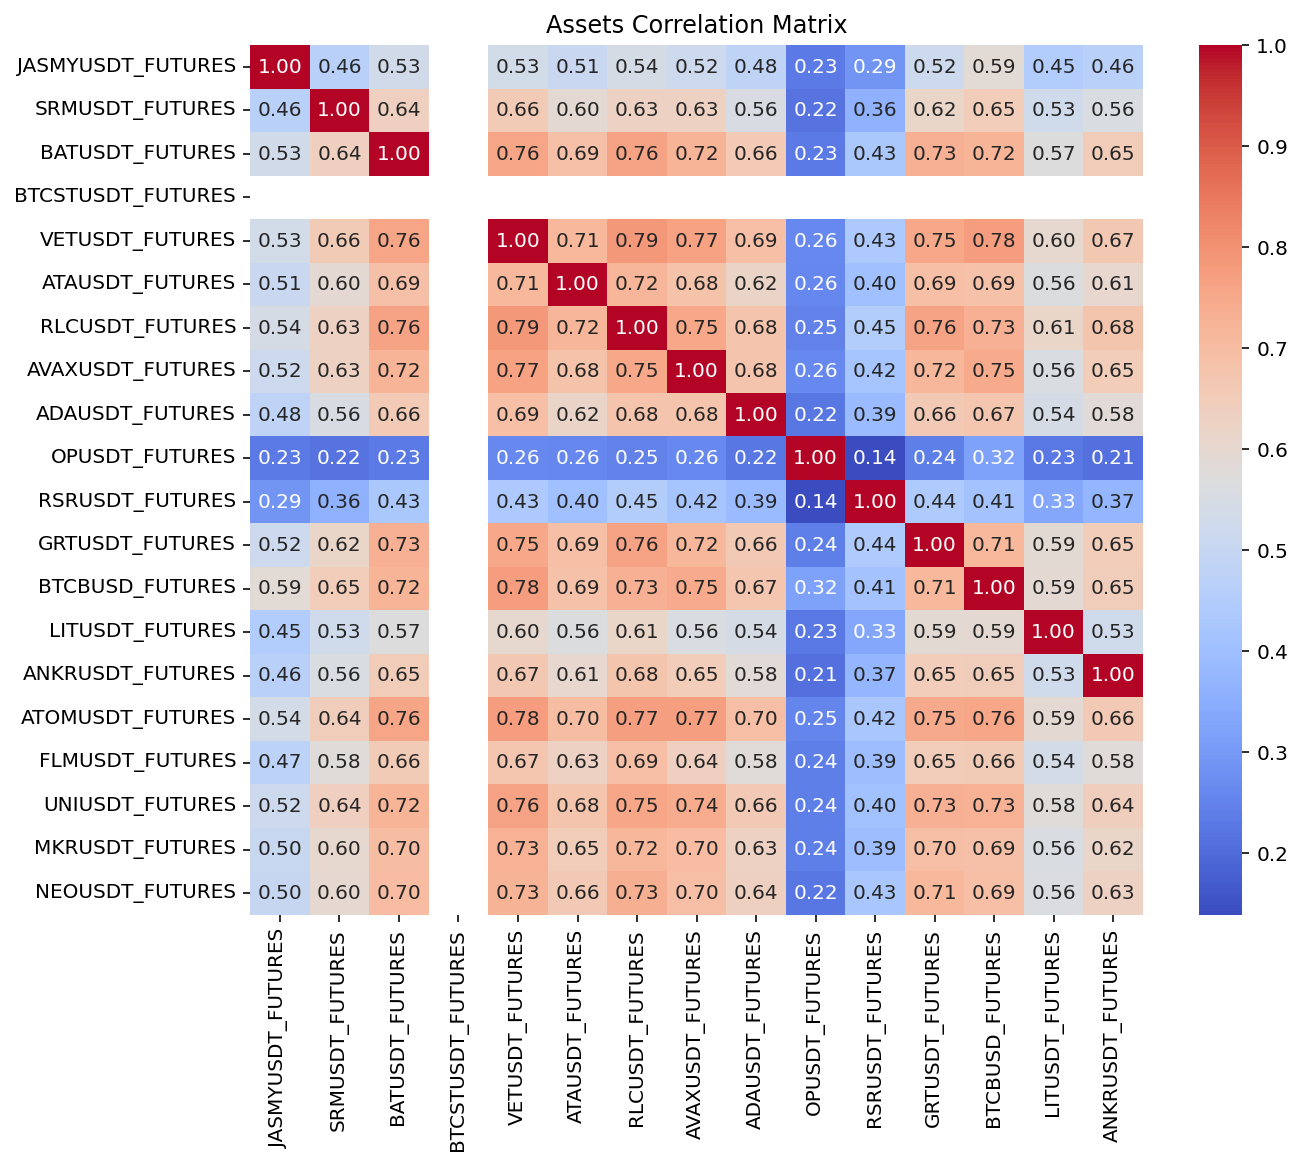

In [65]:
# Pearson correlation to get the basic idea about the relationship
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(matrix.iloc[:20, :15], ax=ax, cmap='coolwarm', annot=True, fmt=".2f") #spearman
ax.set_title('Assets Correlation Matrix')
plt.savefig('images/chart1', dpi=300, facecolor="#ffffff", pad_inches=2)

<h1>Cointegration</h1>

In [34]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            result = coint(data[keys[i]], data[keys[j]])
            pvalue_matrix[i, j] = result[1]
            if result[1] < 0.05:
                pairs.append((keys[i], keys[j], result[1]))
    try:
        a_file = open("coint_pairs_temp_%s.txt" % str(datetime.utcnow().replace(microsecond=0).isoformat()), "w")
        for row in pairs:
            if row[0] is not None:
                a_file.write("%s/%s: %s\n" % (row[0], row[1], row[2]))
        a_file.close()
        
        pv_val_df = pd.DataFrame(pvalue_matrix)
        pv_val_df.columns = data.columns
        pv_val_df.index = data.columns
        pv_val_df.to_excel("coint_matrix_temp.xlsx")
    except:
       print("Couldn't save pairs to temp files") 
    return pvalue_matrix, pairs

In [ ]:
pvalue_matrix, pairs = find_cointegrated_pairs(train_close)

In [16]:
# np array can be saved to xcel/csv via DataFrame
# I guess columns/rows can be assigned via DataFrame
# and original train matrix column names
# pv_val_df = pd.DataFrame(pvalue_matrix)
# pv_val_df.columns = train_close.iloc[:,:10].columns
# pv_val_df.index = train_close.iloc[:,:10].columns
# pv_val_df.to_excel("coint_matrix_test.xlsx")

In [36]:
pairs

[('JASMYUSDT_FUTURES', 'SRMUSDT_FUTURES', 0.0020803593787730415),
 ('JASMYUSDT_FUTURES', 'BATUSDT_FUTURES', 0.0029283798399084133),
 ('JASMYUSDT_FUTURES', 'BTCSTUSDT_FUTURES', 0.0009078771174444834),
 ('JASMYUSDT_FUTURES', 'VETUSDT_FUTURES', 0.013120110678531822),
 ('JASMYUSDT_FUTURES', 'ATAUSDT_FUTURES', 0.01906094885281153),
 ('JASMYUSDT_FUTURES', 'AVAXUSDT_FUTURES', 0.009440415523580213),
 ('JASMYUSDT_FUTURES', 'ADAUSDT_FUTURES', 0.0027773959886156557),
 ('JASMYUSDT_FUTURES', 'OPUSDT_FUTURES', 0.0006134102721981051),
 ('JASMYUSDT_FUTURES', 'RSRUSDT_FUTURES', 1.1459812555476503e-05),
 ('JASMYUSDT_FUTURES', 'GRTUSDT_FUTURES', 0.0004911776082017078),
 ('JASMYUSDT_FUTURES', 'BTCBUSD_FUTURES', 0.013893006211001773),
 ('JASMYUSDT_FUTURES', 'LITUSDT_FUTURES', 0.021349645781948177),
 ('JASMYUSDT_FUTURES', 'ANKRUSDT_FUTURES', 0.005750492457234998),
 ('JASMYUSDT_FUTURES', 'ATOMUSDT_FUTURES', 0.015283913070133989),
 ('JASMYUSDT_FUTURES', 'FLMUSDT_FUTURES', 0.017922297741122546),
 ('JASMYUSDT_F

<h1>Selected pair test</h1>